In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tableprint as tp
plt.style.use("ggplot")

In [3]:
def setText(plot, title, xlab, ylab):
  plot.title(title);plot.xlabel(xlab);plot.ylabel(ylab)

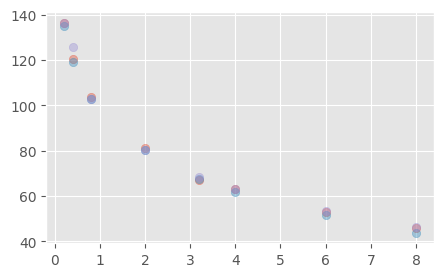

In [4]:
# Raw Data
df = pd.read_csv("data.csv")
plt.figure(figsize=(5,3))
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading1"][:-2], alpha=0.4)
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading2"][:-2], alpha=0.4)
plt.scatter(df["Conc(mg/L)"][:-2],df["Reading3"][:-2], alpha=0.4)

In [5]:
tp.table(np.array(df),headers=df.columns)

╭────────────┬────────────┬────────────┬────────────┬────────────╮
│     Sample │ Conc(mg/L) │   Reading1 │   Reading2 │   Reading3 │
├────────────┼────────────┼────────────┼────────────┼────────────┤
│       STD2 │          8 │       45.8 │       43.8 │       46.5 │
│       STD3 │          6 │         53 │       51.5 │       53.6 │
│       STD4 │          4 │       63.3 │       61.8 │       63.1 │
│       STD5 │        3.2 │       66.9 │       67.7 │       68.4 │
│       STD6 │          2 │         81 │       80.1 │       80.1 │
│       STD7 │        0.8 │      103.5 │      102.7 │      102.6 │
│       STD8 │        0.4 │      120.3 │        119 │      125.5 │
│       STD9 │        0.2 │      136.2 │      134.8 │      136.4 │
│         TP │        nan │       75.3 │       72.5 │       75.8 │
│  LakeWater │        nan │      148.8 │        147 │      147.1 │
╰────────────┴────────────┴────────────┴────────────┴────────────╯


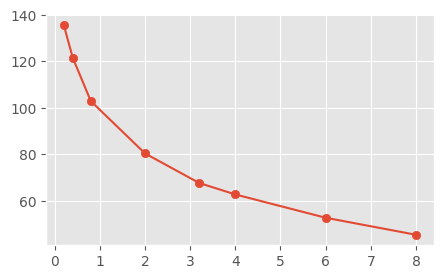

In [6]:
df = pd.read_csv("data.csv")
plt.figure(figsize=(5,3))
plt.plot(df["Conc(mg/L)"][:-2],np.mean([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]],axis=0))
plt.scatter(df["Conc(mg/L)"][:-2],np.mean([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]],axis=0))

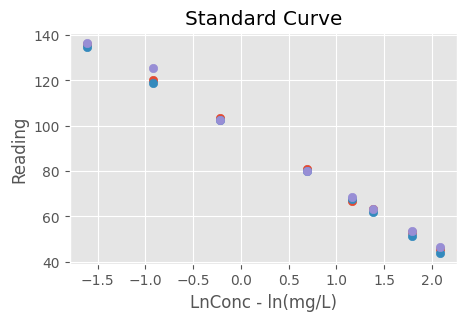

In [7]:
# After log
plt.figure(figsize=(5,3))
setText(plt, "Standard Curve","LnConc - ln(mg/L)","Reading")
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading1"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading2"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading3"][:-2])

In [44]:
# Self implement Gradient Descent linear regression
x = np.append(np.log(df["Conc(mg/L)"][:-2]),np.append(np.log(df["Conc(mg/L)"][:-2]),np.log(df["Conc(mg/L)"][:-2])))
# x = np.append(np.log10(df["Conc(mg/L)"][:-2]),np.append(np.log10(df["Conc(mg/L)"][:-2]),np.log10(df["Conc(mg/L)"][:-2])))
y = np.array([df["Reading1"][:-2],df["Reading2"][:-2],df["Reading3"][:-2]]).flatten()
a = 1
b = 1
def f(x):
    global a,b
    return a*x+b

def f_inverse(y):
    global a,b
    return (y-b)/a
    
def E_a(x): #dE/da
    return -2*(y-f(x))*x  #wnagji f(x) kuohaolimianle-

def E_b(x):
    return -2*(y-f(x))

lr = 0.01
for epoch in range(10000):
    a-=np.mean(E_a(x)*lr)
    b-=np.mean(E_b(x)*lr)

In [45]:
a

-24.856105455038932

In [43]:
a

-57.23329789066015

r^2=0.9977991745102194 dE/da=1.6923499638702802e-13 dE/db=-6.880422157943636e-13
y=-24.856105455038932*x+97.21186760302342


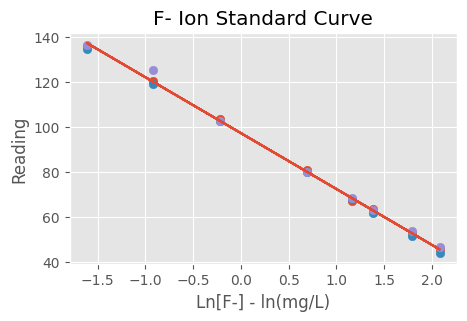

In [47]:
plt.figure(figsize=(5,3))
setText(plt, "F- Ion Standard Curve",r"Ln[F-] - ln(mg/L)","Reading")
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading1"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading2"][:-2])
plt.scatter(np.log(df["Conc(mg/L)"][:-2]),df["Reading3"][:-2])
plt.plot(x,f(x))
print(f"r^2={1-(np.sum((y-f(x))**2)/np.sum((y-np.mean(y))**2))} dE/da={np.mean(E_a(x))} dE/db={np.mean(E_b(x))}")
print(f'y={a}*x+{b}')

In [10]:
#mg/L in water is same as ppm

In [11]:
MW_of_F = 18.99840316
MW_of_NaF =  41.9881724
# Source: pubchem
labeled_NaF_percentage = 0.76
F_percentage = labeled_NaF_percentage*MW_of_F/MW_of_NaF
print(f"{F_percentage}%")
mass_of_tooth_paste_in_gram = 0.2044
mass_of_F_in_tooth_paste = F_percentage * 0.01  * mass_of_tooth_paste_in_gram
print(f"{mass_of_F_in_tooth_paste}g")
tooth_paste_actual_readings = df[df["Sample"] == "TP"]
tooth_paste_actual_reading_mean = np.mean([tooth_paste_actual_readings["Reading1"],
                                            tooth_paste_actual_readings["Reading2"],
                                            tooth_paste_actual_readings["Reading3"]])
tooth_paste_actual_reading_converted_to_LnF = f_inverse(tooth_paste_actual_reading_mean)
tooth_paste_actual_reading_converted_to_concF = np.exp(tooth_paste_actual_reading_converted_to_LnF)
solution_amount_in_L =  50/1000
tooth_paste_actual_reading_converted_to_mg = solution_amount_in_L * tooth_paste_actual_reading_converted_to_concF
print(tooth_paste_actual_reading_converted_to_mg/1000)

0.343877467779474%
0.0007028855441412449g
0.00012451372000704593


In [55]:
E = np.std(np.exp(f_inverse(np.array([tooth_paste_actual_readings["Reading1"],
                                            tooth_paste_actual_readings["Reading2"],
                                            tooth_paste_actual_readings["Reading3"]]))))*1.96/np.sqrt(3)

In [57]:
E + np.mean(np.exp(f_inverse(np.array([tooth_paste_actual_readings["Reading1"],
                                            tooth_paste_actual_readings["Reading2"],
                                            tooth_paste_actual_readings["Reading3"]]))))

2.6624696821555425

In [58]:
np.mean(np.exp(f_inverse(np.array([tooth_paste_actual_readings["Reading1"],
                                            tooth_paste_actual_readings["Reading2"],
                                            tooth_paste_actual_readings["Reading3"]]))))

2.494579758625804

In [53]:
E 

0.0661133571343038

In [28]:
tooth_paste_actual_reading_converted_to_mg/0.2044 #%

0.6091669276274263

In [32]:
print(tooth_paste_actual_reading_converted_to_mg,  F_percentage * 0.01  * 0.2044 * 1000)

0.12451372000704593 0.7028855441412448


In [39]:
(tooth_paste_actual_reading_converted_to_mg/204.4)

0.0006091669276274262

In [40]:
(F_percentage*0.01)#kuneinkunhaishishuliangbuyyiyangd meichabie 

0.00343877467779474

In [27]:
tooth_paste_actual_reading_converted_to_mg/()

0.6091669276274262

In [19]:
lakewater_actual_readings = df[df["Sample"] == "LakeWater"]
lakewater_actual_reading_mean = np.mean([lakewater_actual_readings["Reading1"],
                                            lakewater_actual_readings["Reading2"],
                                            lakewater_actual_readings["Reading3"]])
lakewater_actual_reading_converted_to_LnF = f_inverse(lakewater_actual_reading_mean)
lakewater_actual_reading_converted_to_concF = np.exp(lakewater_actual_reading_converted_to_LnF)
concentration_before_dilution = lakewater_actual_reading_converted_to_concF * 2

In [22]:
concentration_before_dilution

0.2630562871276339

In [14]:
tooth_paste_actual_reading_converted_to_concF

2.4902744001409185

In [15]:
tooth_paste_actual_reading_converted_to_LnF

0.9123929052647541

In [41]:
a

-24.856105455038932